### Energy_Consumption

#### importing the lib

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Energy_consumption.csv")
df= pd.DataFrame(data)
df

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [3]:
df.describe()


,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


#### 1. Timestamp (object)
        a. Example: "2024-01-01 10:00:00"
        b. Used for time-series analysis, trend detection
#### 2.Temperature (°C) (float)
        a. Range: 20°C – 30°C
#### 3. Humidity (%) (float)
        a. Range: 30% – 60%
#### 4. SquareFootage (sq ft) (float)
        a. Range: ~1000 – ~2000 sq ft
        b. Larger spaces → higher energy usage
#### 5. Occupancy (int)
        a. Range: 0 – 9 persons
        b. More people → more usage
#### 6. HVACUsage (object – categorical)
        a. values: "On" or "Off"
        b. Major energy-consuming feature
#### 7. LightingUsage (object – categorical)
        a. values: "Low", "Medium", "High"
        b. Lighting system status
#### 8. RenewableEnergy (kWh) (float)
        a. Energy generated from solar/wind
        b. Range: 0 – 30
#### 9. DayOfWeek (object)
        a. Day name: "Monday" – "Sunday"
        b. Used for weekday/weekend pattern analysis
#### 10. Holiday (object)
        a. Values: "Yes", "No"
        b. Holidays usually have lower occupancy & usage
#### 11. EnergyConsumption (kWh)
        a. Range: 53 – 99 kWh
        b. Final electricity used

In [5]:
# checking any missing value
missing_values = df.isnull().sum()
missing_values

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

#### Correlation Analysis
##### Heatmap

In [6]:
df.corr(numeric_only=True)


,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
Temperature,1.000000,-0.034032,0.004551,-0.003490,-0.001350,0.696410
Humidity,-0.034032,1.000000,-0.014651,0.004766,0.002052,-0.093583
SquareFootage,0.004551,-0.014651,1.000000,0.009696,0.022196,-0.001129
Occupancy,-0.003490,0.004766,0.009696,1.000000,0.013680,0.186580
RenewableEnergy,-0.001350,0.002052,0.022196,0.013680,1.000000,0.081160
EnergyConsumption,0.696410,-0.093583,-0.001129,0.186580,0.081160,1.000000


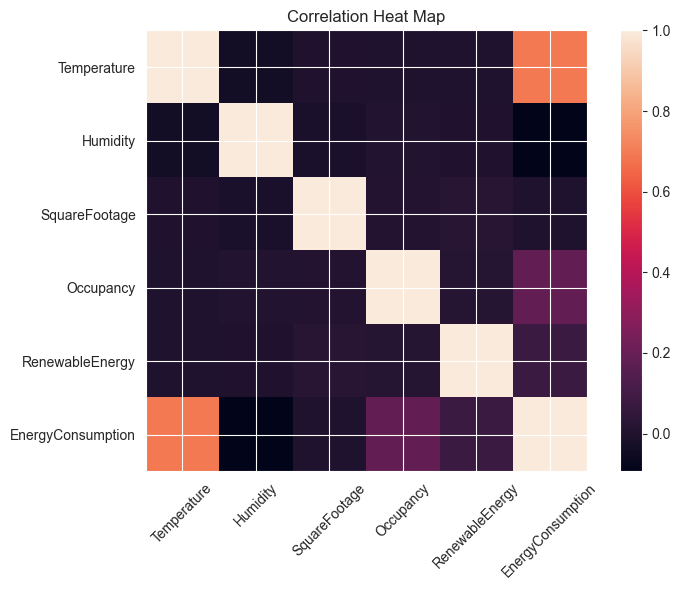

In [7]:
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    plt.figure(figsize=(8, 6))

    plt.imshow(df.corr(numeric_only=True))

    plt.xticks(
        range(len(df.corr(numeric_only=True).columns)),
        df.corr(numeric_only=True).columns,
        rotation=45
    )
    plt.yticks(
        range(len(df.corr(numeric_only=True).columns)),
        df.corr(numeric_only=True).columns
    )

    plt.colorbar()
    plt.title("Correlation Heat Map")
    plt.tight_layout()
    plt.savefig("static/correlation_heatmap.png")
    plt.show()

plot_correlation_heatmap(df)


#### Timestamp Handling
        Hour → hourly energy pattern
        Day → daily variation
        Month → seasonal effect
        IsWeekend → weekend vs weekday behavior

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df["IsWeekend"] = df["Timestamp"].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

### Univariate Analysis

      Histogram of Energy Consumption

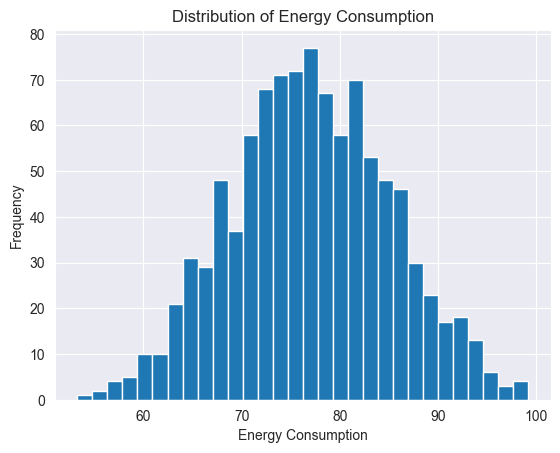

EnergyConsumption
(53.217, 54.795]     1
(54.795, 56.326]     2
(56.326, 57.857]     4
(57.857, 59.388]     5
(59.388, 60.92]     10
(60.92, 62.451]     10
(62.451, 63.982]    21
(63.982, 65.513]    31
(65.513, 67.045]    29
(67.045, 68.576]    48
(68.576, 70.107]    37
(70.107, 71.638]    58
(71.638, 73.17]     68
(73.17, 74.701]     71
(74.701, 76.232]    72
(76.232, 77.763]    77
(77.763, 79.295]    67
(79.295, 80.826]    58
(80.826, 82.357]    70
(82.357, 83.889]    53
(83.889, 85.42]     48
(85.42, 86.951]     46
(86.951, 88.482]    30
(88.482, 90.014]    23
(90.014, 91.545]    17
(91.545, 93.076]    18
(93.076, 94.607]    13
(94.607, 96.139]     6
(96.139, 97.67]      3
(97.67, 99.201]      4
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df['EnergyConsumption'], bins=30)
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.show()

pd.cut(df['EnergyConsumption'], bins=30).value_counts().sort_index()

### Categorical Feature Analysis
     Count Plot for HVAC Usage

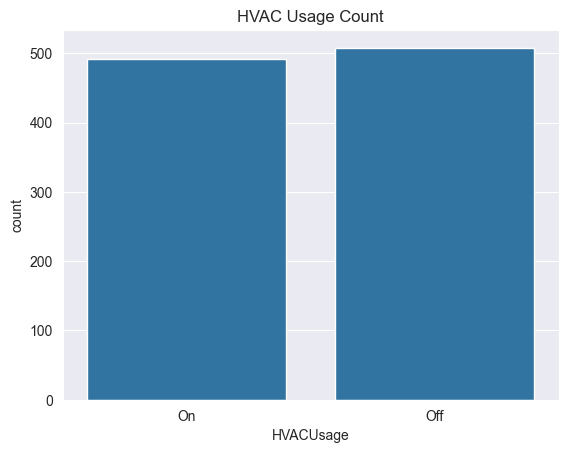

HVACUsage
Off    508
On     492
Name: count, dtype: int64

In [10]:
import seaborn as sns
sns.countplot(x='HVACUsage', data=df)
plt.title("HVAC Usage Count")
plt.show()
# tabular form
df['HVACUsage'].value_counts()


### Boxplot

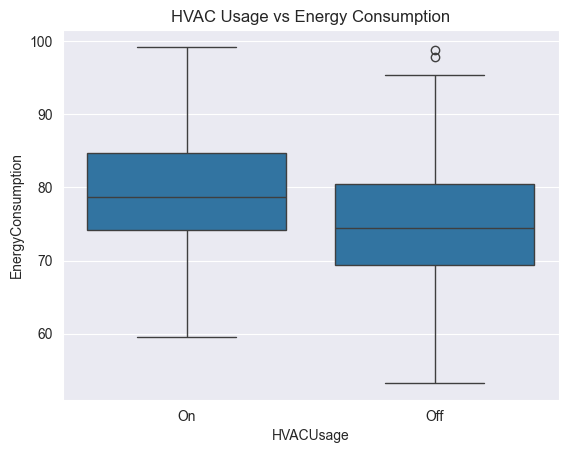

,count,mean,std,min,25%,50%,75%,max
HVACUsage,,,,,,,,
Off,508.0,74.761057,7.986594,53.263278,69.325134,74.417169,80.430330,98.843756
On,492.0,79.425316,7.616502,59.608902,74.212691,78.731899,84.691476,99.201120


In [11]:
sns.boxplot(x='HVACUsage', y='EnergyConsumption', data=df)
plt.title("HVAC Usage vs Energy Consumption")
plt.savefig("static/HVAC Usage vs Energy Consumption.png")
plt.show()

df.groupby('HVACUsage')['EnergyConsumption'].describe()


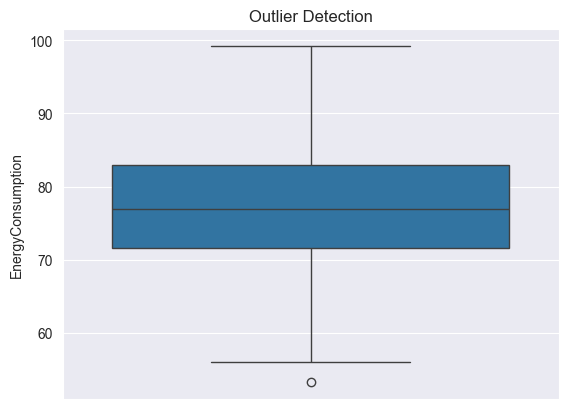

Q1: 71.54469035162519 
Q3: 82.92174206858871 
IQR: 11.377051716963521 
Lower Bound: 54.47911277617991 
Upper Bound: 99.98731964403399 
Number of outliers: 1


In [12]:
sns.boxplot(y=df['EnergyConsumption'])
plt.title("Outlier Detection")
plt.show()

#tabular form
Q1 = df['EnergyConsumption'].quantile(0.25)
Q3 = df['EnergyConsumption'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df['EnergyConsumption'] < lower_bound) |
    (df['EnergyConsumption'] > upper_bound)
]

print(
    "Q1:", Q1,
    "\nQ3:", Q3,
    "\nIQR:", IQR,
    "\nLower Bound:", lower_bound,
    "\nUpper Bound:", upper_bound,
    "\nNumber of outliers:", outliers.shape[0]
)




#### Bivariate Analysis


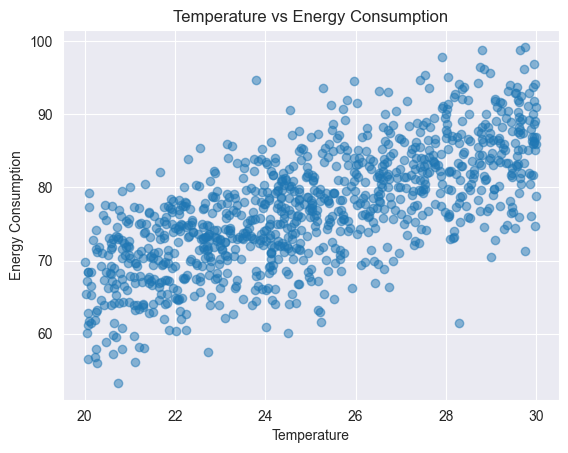

Temp_Bin
(19.998, 22.006]    69.035974
(22.006, 24.004]    73.414927
(24.004, 26.002]    76.712114
(26.002, 28.0]      81.425072
(28.0, 29.999]      84.859845
Name: EnergyConsumption, dtype: float64

In [13]:
plt.figure()
plt.scatter(df['Temperature'], df['EnergyConsumption'], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.title("Temperature vs Energy Consumption")
plt.savefig("static/Temperature vs Energy Consumption.png")
plt.show()

df['Temp_Bin'] = pd.cut(df['Temperature'], bins=5)

df.groupby('Temp_Bin', observed=False)['EnergyConsumption'].mean()



### Feature Engineering
#### Binary Encoding
      HVACUsage → On = 1, Off = 0
      LightingUsage → On = 1, Off = 0
      Holiday → Yes = 1, No = 0

In [14]:
df['HVACUsage']= df['HVACUsage'].replace({'On': 1, 'Off':0 })
df['LightingUsage']= df['LightingUsage'].replace({'On': 1, 'Off':0 })
df['Holiday']=df['Holiday'].replace({'Yes': 1, 'No':0 })
df['DayOfWeek']=df['DayOfWeek'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,'Friday': 5, 'Saturday': 6, 'Sunday': 7})
df.drop(columns=["Timestamp"], inplace=True)
df.head()

C:\Users\rahul\AppData\Local\Temp\ipykernel_26468\3091315118.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HVACUsage']= df['HVACUsage'].replace({'On': 1, 'Off':0 })
C:\Users\rahul\AppData\Local\Temp\ipykernel_26468\3091315118.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LightingUsage']= df['LightingUsage'].replace({'On': 1, 'Off':0 })
C:\Users\rahul\AppData\Local\Temp\ipykernel_26468\3091315118.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month,IsWeekend,Temp_Bin
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373,0,1,1,1,"(24.004, 26.002]"
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,6,0,83.401855,1,1,1,1,"(26.002, 28.0]"
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,7,0,78.270888,2,1,1,1,"(28.0, 29.999]"
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,3,0,56.519850,3,1,1,1,"(19.998, 22.006]"
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732,4,1,1,1,"(22.006, 24.004]"


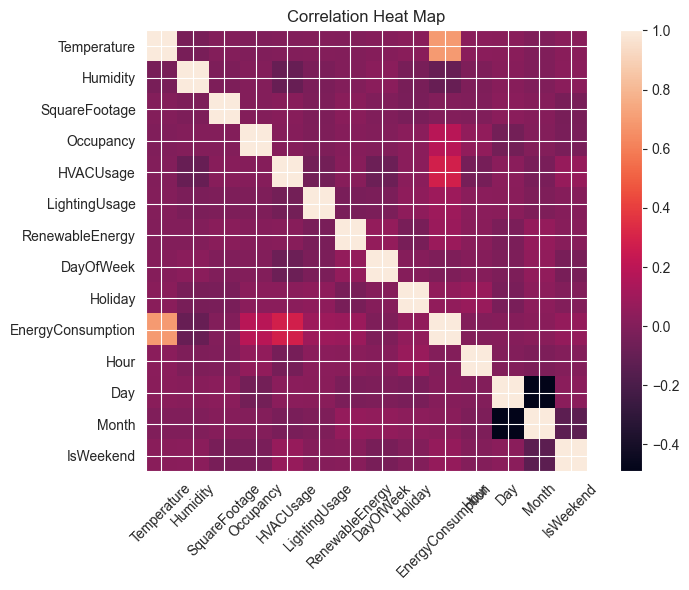

Temperature          0.696410
Humidity            -0.093583
SquareFootage       -0.001129
Occupancy            0.186580
HVACUsage            0.286464
LightingUsage        0.093423
RenewableEnergy      0.081160
DayOfWeek           -0.010524
Holiday              0.056676
EnergyConsumption    1.000000
Hour                 0.007718
Day                  0.010825
Month                0.023197
IsWeekend            0.064034
Name: EnergyConsumption, dtype: float64

In [15]:
plot_correlation_heatmap(df)
df.corr(numeric_only=True)['EnergyConsumption']

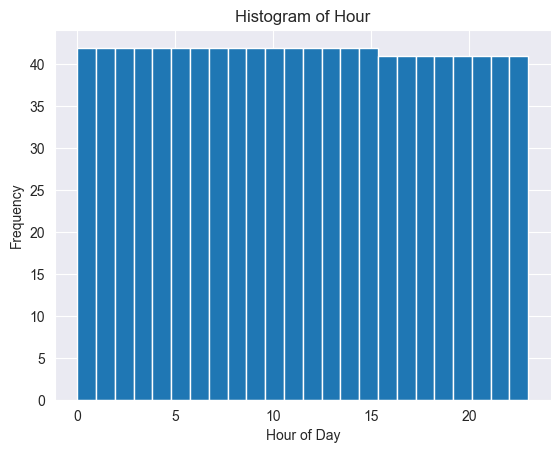

Hour
0     42
1     42
2     42
3     42
4     42
5     42
6     42
7     42
8     42
9     42
10    42
11    42
12    42
13    42
14    42
15    42
16    41
17    41
18    41
19    41
20    41
21    41
22    41
23    41
Name: count, dtype: int64

In [16]:
plt.figure()
plt.hist(df["Hour"], bins=24)
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.title("Histogram of Hour")
plt.show()

df["Hour"].value_counts().sort_index()


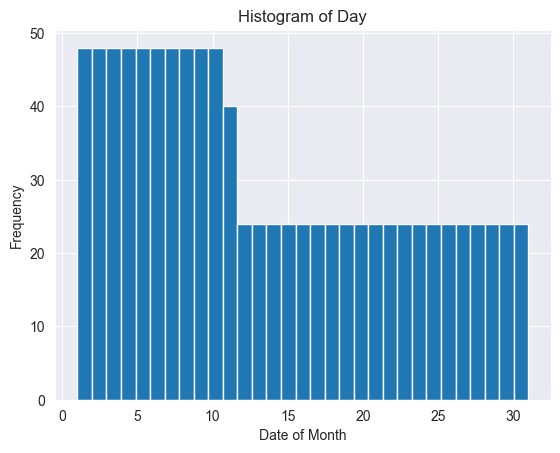

Day
1     48
2     48
3     48
4     48
5     48
6     48
7     48
8     48
9     48
10    48
11    40
12    24
13    24
14    24
15    24
16    24
17    24
18    24
19    24
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
28    24
29    24
30    24
31    24
Name: count, dtype: int64

In [17]:
plt.figure()
plt.hist(df["Day"], bins=31)
plt.xlabel("Date of Month")
plt.ylabel("Frequency")
plt.title("Histogram of Day")
plt.show()

df["Day"].value_counts().sort_index()

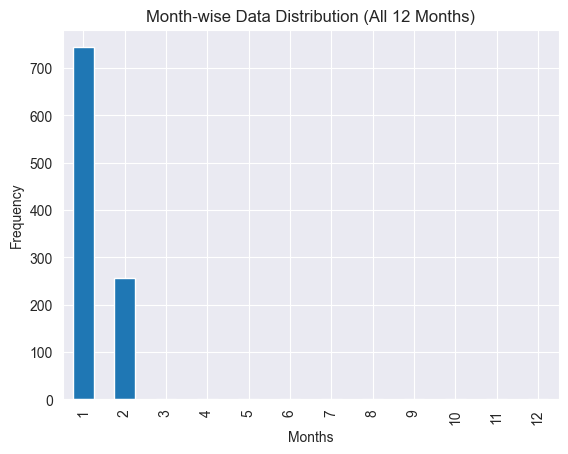

Month
1    744
2    256
Name: count, dtype: int64

In [18]:
month_counts = df["Month"].value_counts().reindex(range(1, 13), fill_value=0)
plt.figure()
month_counts.plot(kind="bar")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Month-wise Data Distribution (All 12 Months)")
plt.show()

df["Month"].value_counts().sort_index()

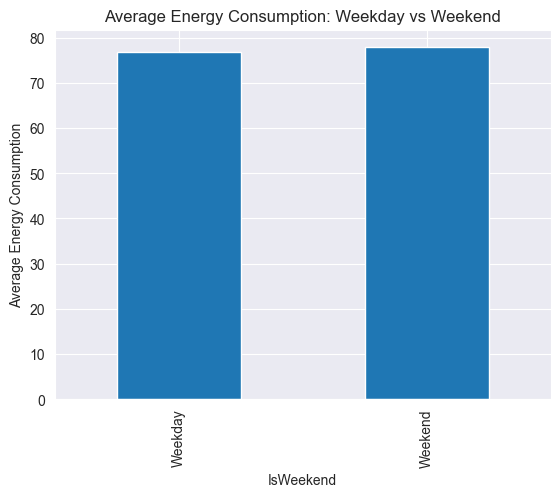

IsWeekend
Weekday    712
Weekend    288
Name: count, dtype: int64

In [19]:
avg_energy = df.groupby("IsWeekend")["EnergyConsumption"].mean()
plt.figure()
avg_energy.plot(kind="bar")
plt.xticks(ticks=[0, 1], labels=["Weekday", "Weekend"])
plt.xlabel("IsWeekend")
plt.ylabel("Average Energy Consumption")
plt.title("Average Energy Consumption: Weekday vs Weekend")
plt.savefig("static/Average Energy Consumption: Weekday vs Weekend.png")
plt.show()

df["IsWeekend"].replace({0: "Weekday", 1: "Weekend"}).value_counts()

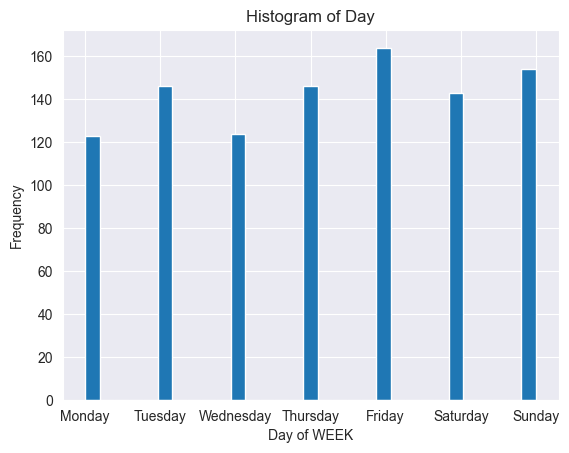

DayOfWeek
Friday       164
Sunday       154
Thursday     146
Tuesday      146
Saturday     143
Wednesday    124
Monday       123
Name: count, dtype: int64

In [20]:
plt.figure()
plt.hist(df["DayOfWeek"], bins=31)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Day of WEEK")
plt.ylabel("Frequency")
plt.title("Histogram of Day")
plt.show()

df["DayOfWeek"].replace({1:'Monday' , 2 : 'Tuesday', 3: 'Wednesday', 4: 'Thursday',5: 'Friday', 6: 'Saturday', 7: 'Sunday'}).value_counts()

## Model Evaluation – Energy Consumption Dataset

linear, randomforest, xgboost and lightgbm model

In [21]:
df.head()



,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month,IsWeekend,Temp_Bin
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373,0,1,1,1,"(24.004, 26.002]"
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,6,0,83.401855,1,1,1,1,"(26.002, 28.0]"
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,7,0,78.270888,2,1,1,1,"(28.0, 29.999]"
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,3,0,56.519850,3,1,1,1,"(19.998, 22.006]"
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732,4,1,1,1,"(22.006, 24.004]"


In [22]:
from sklearn.model_selection import train_test_split
df = df.drop(columns=["Temp_Bin","Hour","Day","IsWeekend",'DayOfWeek','Month','Holiday'])
X = df.drop("EnergyConsumption", axis=1)
y = df["EnergyConsumption"]


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [23]:
X_train

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy
29,23.220630,46.073879,1649.510353,2,0,1,18.270528
535,22.039777,33.460865,1991.131663,7,0,0,4.570970
695,26.118116,43.022562,1576.980679,2,0,0,5.335458
557,23.526242,44.682245,1139.804809,6,1,1,7.639176
836,26.718431,32.282471,1735.317885,5,0,1,22.309696
...,...,...,...,...,...,...,...
106,21.631351,50.476082,1888.701582,4,0,0,5.672987
270,23.349864,33.098464,1721.521278,3,1,1,5.524544
860,26.987898,56.785380,1149.656331,0,1,0,7.502224
435,29.196131,41.387759,1010.271709,6,1,1,11.899718


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def linear_regression_model(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred_lr = lr.predict(X_test)

    lr_mae = mean_absolute_error(y_test, y_pred_lr)
    lr_mse = mean_squared_error(y_test, y_pred_lr)
    lr_rmse = np.sqrt(lr_mse)
    lr_r2 = r2_score(y_test, y_pred_lr)

    print("Linear Regression Results")
    print(f"MAE  : {lr_mae}")
    print(f"MSE  : {lr_mse}")
    print(f"RMSE : {lr_rmse}")
    print(f"R²   : {lr_r2}")

    return lr_mae, lr_mse, lr_rmse, lr_r2

lr_mae, lr_mse, lr_rmse, lr_r2 = linear_regression_model(X_train, X_test, y_train, y_test)


Linear Regression Results
MAE  : 4.099886939991422
MSE  : 26.161687519059125
RMSE : 5.114849706399898
R²   : 0.6005841644032748


In [25]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_model(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(
        n_estimators=200,
        random_state=42
    )

    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    rf_mae = mean_absolute_error(y_test, y_pred_rf)
    rf_mse = mean_squared_error(y_test, y_pred_rf)
    rf_rmse = np.sqrt(rf_mse)
    rf_r2 = r2_score(y_test, y_pred_rf)

    print("Random Forest Regressor Results")
    print(f"MAE  : {rf_mae}")
    print(f"MSE  : {rf_mse}")
    print(f"RMSE : {rf_rmse}")
    print(f"R²   : {rf_r2}")

    return rf_mae, rf_mse, rf_rmse, rf_r2

rf_mae, rf_mse, rf_rmse, rf_r2 = random_forest_model(X_train, X_test, y_train, y_test)

Random Forest Regressor Results
MAE  : 4.4115176707219135
MSE  : 30.034300028292474
RMSE : 5.4803558304449975
R²   : 0.5414601969531276


In [26]:
from xgboost import XGBRegressor

def xgboost_model(X_train, X_test, y_train, y_test):
    ''' xgb = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    )'''
    xgb = XGBRegressor(
    n_estimators=600,          # more trees
    learning_rate=0.03,        # slower learning = better generalization
    max_depth=5,               # slightly shallower trees
    subsample=0.8,             # row sampling
    colsample_bytree=0.8,      # feature sampling
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization
    objective="reg:squarederror",
    random_state=42
)

    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)

    xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
    xgb_mse = mean_squared_error(y_test, y_pred_xgb)
    xgb_rmse = np.sqrt(xgb_mse)
    xgb_r2 = r2_score(y_test, y_pred_xgb)

    print("XGBoost Regressor Results")
    print(f"MAE  : {xgb_mae}")
    print(f"MSE  : {xgb_mse}")
    print(f"RMSE : {xgb_rmse}")
    print(f"R²   : {xgb_r2}")

    return xgb_mae, xgb_mse, xgb_rmse, xgb_r2

xgb_mae, xgb_mse, xgb_rmse, xgb_r2 = xgboost_model(X_train, X_test, y_train, y_test)


XGBoost Regressor Results
MAE  : 4.622683298384573
MSE  : 33.56885953188103
RMSE : 5.793863955244465
R²   : 0.4874973539001448


In [27]:
from lightgbm import LGBMRegressor,early_stopping

def lightgbm_model(X_train, X_test, y_train, y_test):
    lgbm = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42,
    verbose=-1
    )


    lgbm.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric="rmse",
        callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
    )

    y_pred_lgbm = lgbm.predict(X_test)

    lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)
    lgbm_mse = mean_squared_error(y_test, y_pred_lgbm)
    lgbm_rmse = np.sqrt(lgbm_mse)
    lgbm_r2 = r2_score(y_test, y_pred_lgbm)

    print("LightGBM Regressor Results")
    print(f"MAE  : {lgbm_mae}")
    print(f"MSE  : {lgbm_mse}")
    print(f"RMSE : {lgbm_rmse}")
    print(f"R²   : {lgbm_r2}")

    return lgbm_mae, lgbm_mse, lgbm_rmse, lgbm_r2

lgbm_mae, lgbm_mse, lgbm_rmse, lgbm_r2 = lightgbm_model(X_train, X_test, y_train, y_test)


LightGBM Regressor Results
MAE  : 4.259630912524057
MSE  : 28.526042398845597
RMSE : 5.340977663204144
R²   : 0.5644870747461519


In [28]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def lasso_regression_model(X_train, X_test, y_train, y_test):
    lasso = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01))
    ])

    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
    lasso_mse = mean_squared_error(y_test, y_pred_lasso)
    lasso_rmse = np.sqrt(lasso_mse)
    lasso_r2 = r2_score(y_test, y_pred_lasso)

    print("Lasso Regression Results")
    print(f"MAE  : {lasso_mae}")
    print(f"MSE  : {lasso_mse}")
    print(f"RMSE : {lasso_rmse}")
    print(f"R²   : {lasso_r2}")

    return lasso, lasso_mae, lasso_mse, lasso_rmse, lasso_r2

lasso_model, lasso_mae, lasso_mse, lasso_rmse, lasso_r2 = lasso_regression_model(X_train, X_test, y_train, y_test)



Lasso Regression Results
MAE  : 4.098306470120063
MSE  : 26.156989721067106
RMSE : 5.114390454498669
R²   : 0.6006558866463096


In [29]:
from sklearn.linear_model import Ridge

def ridge_regression_model(X_train, X_test, y_train, y_test):
    ridge = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0))
    ])

    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
    ridge_mse = mean_squared_error(y_test, y_pred_ridge)
    ridge_rmse = np.sqrt(ridge_mse)
    ridge_r2 = r2_score(y_test, y_pred_ridge)

    print("Ridge Regression Results")
    print(f"MAE  : {ridge_mae}")
    print(f"MSE  : {ridge_mse}")
    print(f"RMSE : {ridge_rmse}")
    print(f"R²   : {ridge_r2}")

    return ridge_mae, ridge_mse, ridge_rmse, ridge_r2

ridge_mae, ridge_mse, ridge_rmse, ridge_r2 = ridge_regression_model(X_train, X_test, y_train, y_test)



Ridge Regression Results
MAE  : 4.099588898127839
MSE  : 26.16155045200233
RMSE : 5.114836307449372
R²   : 0.6005862570340724


In [30]:
comparison_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Random Forest",
        "XGBoost",
        "LightGBM"
    ],
    "MAE": [
        lr_mae,
        ridge_mae,
        lasso_mae,
        rf_mae,
        xgb_mae,
        lgbm_mae
    ],
    "MSE": [
        lr_mse,
        ridge_mse,
        lasso_mse,
        rf_mse,
        xgb_mse,
        lgbm_mse
    ],
    "RMSE": [
        lr_rmse,
        ridge_rmse,
        lasso_rmse,
        rf_rmse,
        xgb_rmse,
        lgbm_rmse
    ],
    "R2 Score": [
        lr_r2,
        ridge_r2,
        lasso_r2,
        rf_r2,
        xgb_r2,
        lgbm_r2
    ]
})

# Sort by best model (highest R2)
comparison_df = comparison_df.sort_values(
    by="R2 Score", ascending=False
).reset_index(drop=True)

print(comparison_df)


               Model       MAE        MSE      RMSE  R2 Score
0   Lasso Regression  4.098306  26.156990  5.114390  0.600656
1   Ridge Regression  4.099589  26.161550  5.114836  0.600586
2  Linear Regression  4.099887  26.161688  5.114850  0.600584
3           LightGBM  4.259631  28.526042  5.340978  0.564487
4      Random Forest  4.411518  30.034300  5.480356  0.541460
5            XGBoost  4.622683  33.568860  5.793864  0.487497


## Model Evaluation
### Models Evaluated
    a. Linear Regression
    b. Ridge Regression
    c. Lasso Regression
    d. Random Forest Regressor
    e. XGBoost Regressor
    f. LightGBM Regressor
### Evaluation Metrics
    a. MAE (Mean Absolute Error) – lower is better
    b. MSE (Mean Squared Error) – lower is better
    c. RMSE (Root Mean Squared Error) – lower is better
    d. R² Score – higher is better
### Best Model Selection
#### Selected Model: Lasso Regression
##### Reasons for selection:
    a. Achieved the lowest MAE and RMSE
    b. Obtained the highest R² score
    c. Effectively reduced noise through L1 regularization
    d. Demonstrated strong generalization on unseen test data

In [31]:
print(comparison_df)

               Model       MAE        MSE      RMSE  R2 Score
0   Lasso Regression  4.098306  26.156990  5.114390  0.600656
1   Ridge Regression  4.099589  26.161550  5.114836  0.600586
2  Linear Regression  4.099887  26.161688  5.114850  0.600584
3           LightGBM  4.259631  28.526042  5.340978  0.564487
4      Random Forest  4.411518  30.034300  5.480356  0.541460
5            XGBoost  4.622683  33.568860  5.793864  0.487497


In [32]:
import pickle
final_model = lasso_model
with open("energy_consumption_model.pkl", "wb") as file:
    pickle.dump(final_model, file)
